{'energy': 0.639, 'tempo': 164.088, 'speechiness': 0.0539, 'instrumentalness': 0, 'key': 5, 'liveness': 0.0945, 'acousticness': 0.0359, 'songLength': 219120, 'danceability': 0.761, 'loudness': -7.577, 'valence': 0.933, 'spotifyID': u'47TqCCnEliDp8NRDyIQoQq', 'mode': 0}
{'energy': 0.638, 'tempo': 184.086, 'speechiness': 0.075, 'instrumentalness': 7.66e-05, 'key': 10, 'liveness': 0.0849, 'acousticness': 0.02, 'songLength': 250627, 'danceability': 0.378, 'loudness': -5.576, 'valence': 0.762, 'spotifyID': u'7a86XRg84qjasly9f6bPSD', 'mode': 1}
{'energy': 0.57, 'tempo': 115.376, 'speechiness': 0.0348, 'instrumentalness': 0.362, 'key': 0, 'liveness': 0.0812, 'acousticness': 0.45, 'songLength': 219933, 'danceability': 0.764, 'loudness': -11.361, 'valence': 0.972, 'spotifyID': u'6UjlpJhUqOQqv0hrb38IDI', 'mode': 1}
{'energy': 0.8, 'tempo': 93.01, 'speechiness': 0.0339, 'instrumentalness': 0, 'key': 5, 'liveness': 0.0834, 'acousticness': 0.0563, 'songLength': 219467, 'danceability': 0.71, 'loudne

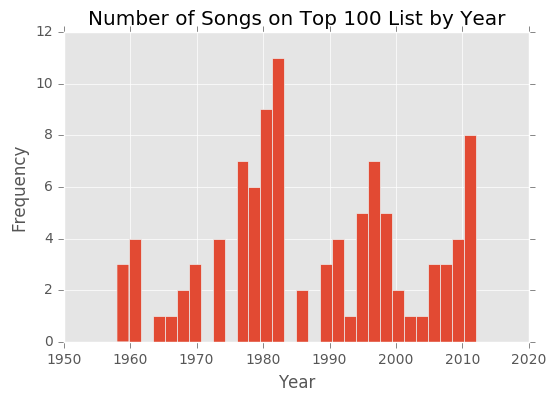

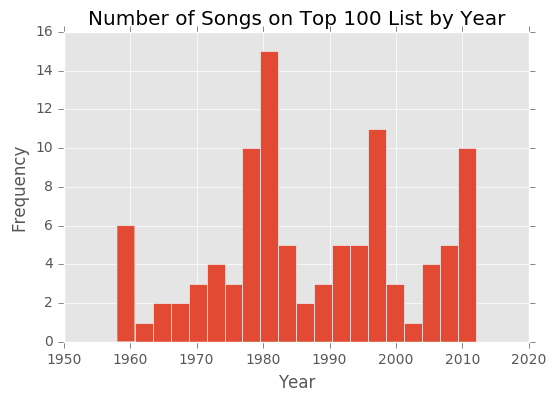

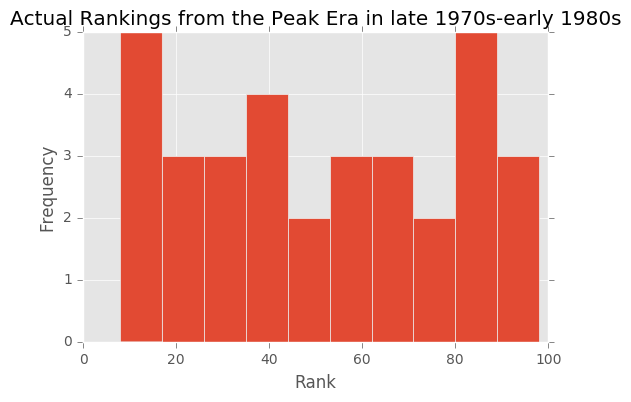

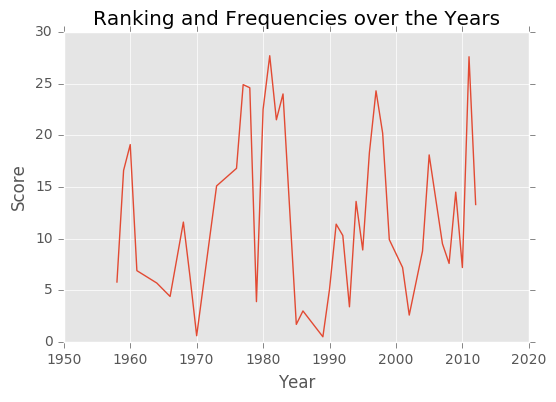

In [1]:
import pandas as pd
import numpy as np
import Tasks2Cindy

In [2]:
final_data = Tasks2Cindy.final_data

In [3]:
songs100 = Tasks2Cindy.top100songs

In [4]:
songs100.loc[19]

Artist    Michael Jackson
Title         Billie Jean
Year                 1983
Name: 19, dtype: object

In [5]:
art_list = songs100["Artist"].unique().tolist()
temp =[artist.split("&") for artist in art_list]
temp = reduce(lambda x, y: x + y, temp, [])
unique_artists = reduce(lambda x, y: x + y, [artist.split("feat.") for artist in temp], [])
unique_artists = [artist.strip() for artist in unique_artists]

In [6]:
temp = reduce(lambda x, y: x + y, [artist.split("&") for artist in songs100["Artist"]], [])
temp = reduce(lambda x, y: x + y, [artist.split("feat.") for artist in temp], [])
temp = [artist.strip() for artist in temp]
all_artists = reduce(lambda x, y: x + y, [artist.split(" and ") for artist in temp], [])

double_artists = pd.Series(all_artists).value_counts().head(13)
double_artists

Lionel Richie          3
Boyz II Men            3
The Black Eyed Peas    2
Maroon 5               2
Usher                  2
Andy Gibb              2
Paul McCartney         2
Bee Gees               2
Mariah Carey           2
The Beatles            2
Marvin Gaye            2
Diana Ross             2
Michael Jackson        2
dtype: int64

In [25]:
# look for the years associated with each artist
# for each artist in doublehits, scan through the artists columnto search 
#if their name is there, and then return the corresponding Year(s), Score, and Rank


#pd.DataFrame([songs100.loc[i] for i, j in enumerate(songs100["Artist"]) if j in " ".join(double_artists.index)])

doubleA_entries = []

for artist in double_artists.index:
    for ind, value in enumerate(songs100["Artist"]):
        if artist in value:
            doubleA_entries.append(songs100.loc[ind])

#pd.DataFrame(doubleA_entries)

A question to look into is to see what the range is for each artist, to see where was the beginning and end of their top stardom? Which artists have lived in the spotlight for the longest?

In [8]:
def decade_indicator(year):
    yearRange = range(195, 202)
    for yr in yearRange:
        if str(yr) in str(year):
            return str(yr) + "0's"
        
decade_indicator(1954)

"1950's"

In [9]:
main_df = Tasks2Cindy.main_df
main_df["Decade"] = [decade_indicator(year) for year in main_df["Year"]]

In [16]:
# VISUALISATION
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
#import wordcloud
#from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')
import random
import nltk
import ContentDensity

In [22]:
# lexical density divided by decade, boxplot
lexical_with_stop = ContentDensity.lexical_words_in_songs
#song_bigram = ContentDensity.song_bigram
#song_trigram = ContentDensity.song_trigram

In [24]:
lex_df = main_df
lex_df["Lexical"] = lexical_with_stop

In [45]:
main_df.head()

,Artist,Title,Year,Lyric,Url,acousticness,danceability,energy,instrumentalness,key,...,mode,songLength,speechiness,spotifyID,tempo,valence,Rank,Decade,Lexical,Lexical Density
0,Usher,You Make Me Wanna...,1997,This is what you do\nThis is what you do\nThis...,http://www.songlyrics.com/usher/you-make-me-wa...,0.0359,0.761,0.639,0.000000,5,...,0,219120,0.0539,47TqCCnEliDp8NRDyIQoQq,164.088,0.933,100,1990's,"[is, do, is, do, is, do, is, do, make, leave, ...",0.428571
1,fun. feat. Janelle Monae,We Are Young,2012,"Give me a second, I\nI need to get my story st...",http://www.songlyrics.com/fun-feat-janelle-mon...,0.0200,0.378,0.638,0.000077,10,...,1,250627,0.0750,7a86XRg84qjasly9f6bPSD,184.086,0.762,99,2010's,"[give, second, i, i, need, get, story, straigh...",0.637195
2,Emotions,Best of My Love,1977,Every night I'm lyin' in bed\nHoldin' you clos...,http://www.songlyrics.com/emotions/best-of-my-...,0.4500,0.764,0.570,0.362000,0,...,1,219933,0.0348,6UjlpJhUqOQqv0hrb38IDI,115.376,0.972,98,1970's,"[night, i'm, lyin', bed, holdin', close, dream...",0.557252
3,Maroon 5,One More Night,2012,You and I go hard at each other like we're goi...,http://www.songlyrics.com/maroon-5/one-more-ni...,0.0563,0.710,0.800,0.000000,5,...,0,219467,0.0339,4XNrMwGx1SqP01sqkGTDmo,93.010,0.634,97,2010's,"[i, go, hard, other, we're, going, war, i, go,...",0.609195
4,Phil Collins,Another Day in Paradise,1989,"She calls out to the man on the street\n""Sir, ...",http://www.songlyrics.com/phil-collins/another...,0.7360,0.780,0.565,0.002690,3,...,0,322133,0.0306,1NCuYqMc8hKMb4cpNTcJbD,101.967,0.390,96,1980's,"[calls, man, street, ""sir, can, help, me?, it'...",0.518152


In [38]:
lexical_no_stop = lexical_words_in_songs_no_top
lex_df = main_df
lex_df["Lexical"] = lexical_no_stop

def word_cloud_time(df, beginYear, endYear):
    # get range of entries
    temp = df[df["Year"] >= beginYear]
    lex_list = temp[temp["Year"] <= 1969]["Lexical"]
    
    #lex_list = df[(df["Year"] >= beginYear) and (df["Year"] <= endYear)]
    # get the lexical
    entries = reduce(lambda x, y: x + y, lex_list, [])
    long_string = " ".join(entries)
    
    #print long_string
    
     GENERATE WORD CLOUD
    wc.generate(long_string)

    # COLORING
    def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(50, 0%%, %d%%)" % random.randint(10, 50)

    # PLOTTING
    plt.figure(figsize=(20,10))
    plt.imshow(wc.recolor(color_func = grey_color_func, random_state=3))
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    
    
word_cloud_time(lex_df, 1950, 1959)    
word_cloud_time(lex_df, 1960, 1969)
word_cloud_time(lex_df, 1970, 1979)
word_cloud_time(lex_df, 1980, 1989)
word_cloud_time(lex_df, 1990, 1999)
word_cloud_time(lex_df, 2000, 2009)
word_cloud_time(lex_df, 2010, 2019)

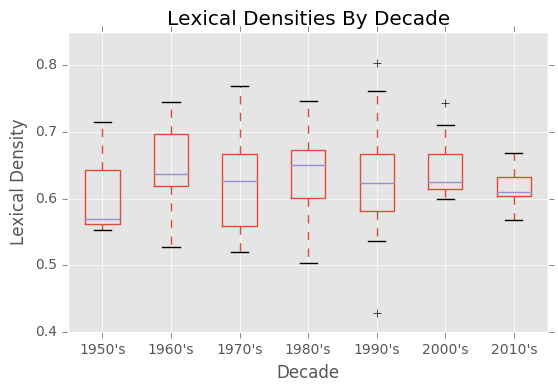

In [44]:
lexical_density_list = ContentDensity.lexical_density_list

main_df["Lexical Density"] = lexical_density_list

main_df.boxplot("Lexical Density", "Decade")
plt.ylabel("Lexical Density")
plt.title("Lexical Densities By Decade")
plt.suptitle("")

plt.show()

In [ ]:
from NGRAMS import song_bigram, song_trigram

main_df = pd.concat([main_df,song_bigram, song_trigram], axis = 1)

# tack on song_bigrams and song_trigrams to main_df

In [ ]:
# trigram per decade
decades = [df[df["Year"] >= (1900 + i*10) and df["Year"] < (1900 + (i+1)*10)]  for i in range(5, 12)]

In [ ]:
# maybe create a trigram per decade
# timeless - phrases that appear through all time periods
# unique - what's unique to one time period

In [ ]:
# bar plot of bigrams/trigrams